This notebook will showcase an application of MyGrad for minimizing a simple 1D polynomial. We'll try to minimize the polynomial

\begin{equation}
f(x) = x^4 - 3x^3 - 7x^2 + 9x - 4
\end{equation}

using gradient descent.

First, we'll need to import the `Tensor` object from MyGrad. We'll also use matplotlib to view our polynomial and our iterative solution and NumPy for some convenient functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mygrad import Tensor

Now we'll define our polynomial $f(x)$

In [2]:
def f(x):
    return x**4 - 3*x**3 - 7*x**2 + 9*x - 4

Let's plot $f$ on a domain to see what our problem looks like

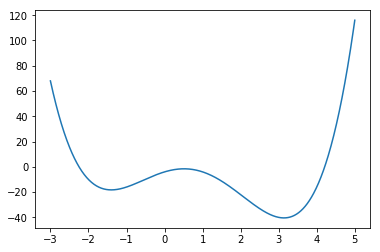

In [3]:
x = np.linspace(-3, 5, 1000)

fig, ax = plt.subplots()
ax.plot(x, f(x))

We can see our global minimum is somewhere around 3.1. Let's use MyGrad to help us find a more exact solution.

We'll use the gradient descenct algorithm to to this. We pick a point close to our minimum, then evaluate how good our estimate is based on the gradient of our function at that point. Then we'll step our guess a small amount to be a little better next time. Iterating on this, we converge to a solution.

Even with a pretty bad guess, we can often arrive at a good solution. First, let's start with a guess of $x = 1$.

In [4]:
step_size = 0.005       # a small amount to update our guesses
guesses = [Tensor(1.0)] # our estimates

for iteration in range(100):
    guess_val = f(guesses[-1])                               # get the value of the function at our guess
    guess_val.backward()                                     # compute the gradient of f with respect to our guess
    guesses.append(guesses[-1] - step_size*guesses[-1].grad) # update our guess

Let's see how our guesses do. We'll plot the guesses over time, using transparency to indicate which points are older.

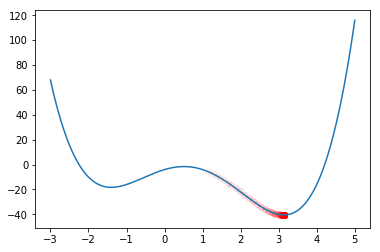

In [5]:
fig, ax = plt.subplots()
ax.plot(x, f(x))

for i, guess in enumerate(guesses):
    ax.scatter(guess, f(guess), color='red', alpha=i/len(guesses))

We can see a trail from our $x=1$ value down to our minimum; just what we expect! Let's see what our predicted minimum is and how close it is to a critical point of the function.

In [6]:
print(f'Minimum: f({guesses[-1].data}) = {f(guesses[-1].data)}')

Minimum: f(3.1370619754342215) = -40.42312563910335


In [7]:
df = lambda x: 4*x**3 - 9*x**2 - 14*x + 9
df(guesses[-1].data)

-7.74441843987006e-09

Very close to a critical point!

Of course, the downside to our gradient method is that if our guess isn't reasonably close to our global minimum, it may well find a local minimum:

Bad Minimum: f(-1.3995390155773912) = -18.246403687477958


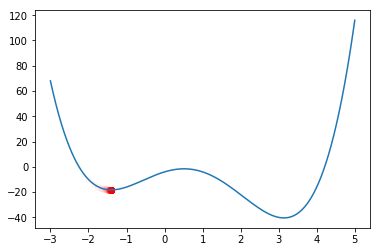

In [8]:
step_size = 0.005
guesses = [Tensor(-2.9)]

for iteration in range(100):
    guess_val = f(guesses[-1])
    guess_val.backward()
    guesses.append(guesses[-1] - step_size*guesses[-1].grad)
    

fig, ax = plt.subplots()
ax.plot(x, f(x))

for i, guess in enumerate(guesses):
    ax.scatter(guess, f(guess), color='red', alpha=i/len(guesses))
    
print(f'Bad Minimum: f({guesses[-1].data}) = {f(guesses[-1].data)}')